In [1]:
%reload_ext autoreload
%autoreload 2
from scanpy_helpers_1 import *
from scanpy_helpers_2 import *
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('s3://darmanis-group/singlecell_lungadeno/TN_bulkized_data.csv', index_col = 0)
df.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,sample_name,patient_id,dor,dor_class
LT_S34,0.003117,0.0,0.0,0.006594,0.0,0.000779,0,0.0,0.194448,0.0,...,0.688767,0.0,1.173231,0.720418,0.000000,1.248528,LT_S34,TH_205,0.12,low
LT_S43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.009454,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,LT_S43,TH_217,0.43,low
LT_S45,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.000000,0.0,...,10.834236,0.0,0.000000,0.471054,0.000000,0.000000,LT_S45,TH_218,0.31,low
LT_S49,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.177676,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,LT_S49,TH_223,0.50,low
LT_S51,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.277587,0.0,...,0.029913,0.0,0.014789,0.308163,0.007502,0.108279,LT_S51,TH_227,0.57,high


In [12]:
omit_colnames = ['sample_name','patient_id','dor','dor_class']
genes = list(set(df.columns)-set(omit_colnames))
ref1 = df[df.dor_class == 'low'].loc[:, genes]
ref2 = df[df.dor_class == 'high'].loc[:, genes]

mwu_df = pd.DataFrame()
for test in ['greater','less']:
    stat_pval_tuple = parallel_mwu(genes, 
                                   ref1,
                                   ref2,  
                                   test,
                                   7)
    stat_list = stat_pval_tuple[0]
    pval_list = stat_pval_tuple[1]
    slice_df = (pd.DataFrame({'gene':genes,
                             'stat_1':stat_list,
                             'pval_1':pval_list
                            })
              )
    slice_df['test'] = test
    mwu_df = mwu_df.append(slice_df)


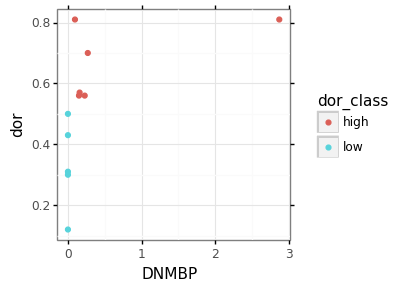

<ggplot: (8782587925245)>

In [28]:

goi = 'DNMBP'
plotnine.options.figure_size = (3,3)
(ggplot(df.loc[:,[goi]+omit_colnames])
 + theme_bw()
 + geom_point(aes(goi,'dor', color = 'dor_class'))
#  + scale_x_continuous(trans='log2')
)

In [38]:
mwu_df[mwu_df.test == 'less'].sort_values('pval_1', ascending = True)

,gene,stat_1,pval_1,test
11467,ZC3H10,0.0,0.002747,less
11595,LINC01061,0.0,0.002747,less
6834,USP45,0.0,0.002747,less
7571,TOX,0.0,0.002747,less
12871,TRPV1,0.0,0.002747,less
5232,MON1A,0.0,0.002747,less
3832,RLN1,0.0,0.002747,less
1178,TTLL13P,0.0,0.002747,less
11850,DNMBP,0.0,0.002747,less
17415,EEF2K,0.0,0.002747,less


In [29]:
mwu_df.to_csv('/home/ubuntu/data/mwu_luad.csv')

In [31]:
fn = '/home/ubuntu/data/mwu_luad.csv'
! aws s3 cp {fn} s3://darmanis-group/singlecell_lungadeno/

upload: ../../data/mwu_luad.csv to s3://darmanis-group/singlecell_lungadeno/mwu_luad.csv


In [39]:
print('computing...')

run_me = True

if run_me == True:

    # Protocol:
        # download counts table: https://gdc.xenahubs.net/download/TCGA-SKCM/Xena_Matrices/TCGA-SKCM.htseq_fpkm-uq.tsv.gz
        # gunzip file
        # push to s3: s3://daniel.le-work/MEL_project/TCGA-SKCM.htseq_fpkm-uq.tsv
        
    import json, os, glob, tqdm, mygene
    import pandas as pd

    # melanoma files
    counts_table = 's3://s3://daniel.le-work/MEL_project/TCGA-LUAD.htseq_fpkm-uq.tsv'
    clinical_outcomes = 's3://daniel.le-work/MEL_project/tcga_metadata.csv'
    group = 'luad'

    wkdir, s3dir = '/home/ubuntu/data/DL20181011_melanocyte_test_data', 'daniel.le-work/MEL_project'

    # compile counts data in df
    tcga_df = pd.read_csv(counts_table, sep = '\t').rename(columns = {'Ensembl_ID':'gene'})
    tcga_df['gene'] = [x.split('.')[0] for x in tcga_df['gene']]
    tcga_df_genes = tcga_df.gene.tolist()

    print('computing...')

    # convert ensmble to gene symbols
    run_me = True
    if run_me == True:

        # pull ids
        mg = mygene.MyGeneInfo()
        ensembl2symbol_dict = mg.querymany(tcga_df_genes, scopes='ensembl.gene', species='human',returnall=True)

    # remove failed queries and multiples
    tcga_df_fltr = tcga_df[[x not in ensembl2symbol_dict['missing'] + ensembl2symbol_dict['dup'] for x in tcga_df.gene]]

    # create merge df to transfer symbols
    ens2sym_df = pd.DataFrame()
    for record in tqdm.tqdm(ensembl2symbol_dict['out']):
        ensembl = record.get('query')
        sym = record.get('symbol', 'none')
        record_slice = pd.DataFrame({'ens':[ensembl],
                                    'sym':[sym]}
                                   )
        ens2sym_df = ens2sym_df.append(record_slice)

    # merge symbols
    tcga_df_fltr = pd.merge(tcga_df_fltr, ens2sym_df.rename(columns = {'ens':'gene'}), 'left', 'gene')

    # rename and filter records with no symbols or duplicates
    tcga_df_fltr = tcga_df_fltr[tcga_df_fltr.sym != 'none']
    tcga_df_fltr = tcga_df_fltr.drop('gene', axis = 1).rename(columns = {'sym':'gene'}).set_index('gene')
    tcga_df_fltr = tcga_df_fltr[~tcga_df_fltr.index.duplicated('first')]
    
    # transpose
    tcga_df_fltr = tcga_df_fltr.T.reset_index().rename(columns = {'index':'submitter_id'})
    tcga_df_fltr['barcode'] = [x.split('-')[-2] for x in tcga_df_fltr['submitter_id']]

    # align metadata
    ## ref = https://www.sciencedirect.com/science/article/pii/S0092867418302290#mmc1
    tcga_meta = pd.read_csv(clinical_outcomes,index_col=0)
    tcga_meta['barcode'] = [x.split('-')[-1] for x in tcga_meta['bcr_patient_barcode']]
    tcga_meta_ordered = pd.merge(tcga_df_fltr.loc[:,'barcode'],
                                     tcga_meta,
                                     'left',
                                     'barcode'
                                    )

    # remove multiple merges
    omit_id = tcga_meta_ordered.barcode.value_counts()[tcga_meta_ordered.barcode.value_counts() > 1].index.tolist()
    tcga_meta_ordered = tcga_meta_ordered[[x not in omit_id for x in tcga_meta_ordered.barcode]]

    # write dfs to csv and push to s3
    print('computing...')
    tcga_df_fltr = tcga_df_fltr.drop('submitter_id', axis = 1).set_index('barcode').T
    fn_dict = {'tcga_df_fltr':f'/home/ubuntu/data/DL20181011_melanocyte_test_data/tcga_{group}_counts.csv',
               'tcga_meta_ordered':f'/home/ubuntu/data/DL20181011_melanocyte_test_data/tcga_{group}_metadata.csv'
              }
    for key,value in fn_dict.items():
        eval(key).to_csv(value)
        ! aws s3 cp {value} s3://{s3dir}/
        

computing...
computing...
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 3

100%|██████████| 60484/60484 [02:12<00:00, 455.73it/s]


computing...
upload: ../../data/DL20181011_melanocyte_test_data/tcga_luad_counts.csv to s3://daniel.le-work/MEL_project/tcga_luad_counts.csv
upload: ../../data/DL20181011_melanocyte_test_data/tcga_luad_metadata.csv to s3://daniel.le-work/MEL_project/tcga_luad_metadata.csv


In [42]:
len(tcga_df_fltr.columns)

585

In [43]:
tcga_meta_ordered.head()

,barcode,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,...,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
0,4244,TCGA-05-4244,LUAD,70.0,MALE,[Not Available],Stage IV,[Not Applicable],Lung Adenocarcinoma,[Not Available],...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
1,4249,TCGA-05-4249,LUAD,67.0,MALE,[Not Available],Stage IB,[Not Applicable],Lung Adenocarcinoma,[Not Available],...,NaN,0.0,1523.0,0.0,1523.0,NaN,NaN,0.0,1523.0,NaN
2,4250,TCGA-05-4250,LUAD,79.0,FEMALE,[Not Available],Stage IIIA,[Not Applicable],Lung Adenocarcinoma,[Not Available],...,NaN,1.0,121.0,NaN,121.0,NaN,NaN,0.0,121.0,NaN
3,4382,TCGA-05-4382,LUAD,68.0,MALE,[Not Available],Stage IB,[Not Applicable],Lung Adenocarcinoma,[Not Available],...,NaN,0.0,607.0,0.0,607.0,1.0,334.0,1.0,334.0,NaN
4,4384,TCGA-05-4384,LUAD,66.0,MALE,[Not Available],Stage IIIA,[Not Applicable],Lung Adenocarcinoma,[Not Available],...,NaN,0.0,426.0,0.0,426.0,NaN,NaN,1.0,183.0,NaN
